In [70]:
import csv, os
from datetime import datetime, timedelta
import numpy as np 
import pandas as pd
from functools import reduce
import functools

In [78]:
pd.__version__

'1.5.3'

In [238]:
expressed = pd.read_csv('csvbaby/Gabrielle Tong_expressed.csv')
expressed.drop('Note',axis=1,inplace=True)
expressed['rounded_timestamp'] = pd.to_datetime(expressed['Time'], format='%d/%m/%Y %H:%M')
expressed['Type'] = 'expressedmilk'
expressed4join = expressed[['rounded_timestamp','Amount (ml)']]
expressed4join.columns = ['rounded_timestamp','expressedbeforemeal_ml']
expressed4join

,rounded_timestamp,expressedbeforemeal_ml
0,2024-11-25 02:55:00,35
1,2024-11-25 06:32:00,40
2,2024-11-25 10:00:00,40
3,2024-11-25 12:56:00,25
4,2024-11-25 14:20:00,45
5,2024-11-25 17:16:00,40
6,2024-11-25 20:25:00,20
7,2024-11-25 22:55:00,17
8,2024-11-26 07:51:00,20
9,2024-11-26 22:56:00,90


In [239]:
formula = pd.read_csv('csvbaby/Gabrielle Tong_formula.csv')
formula.drop('Note',axis=1,inplace=True)
formula['rounded_timestamp'] = pd.to_datetime(formula['Time'], format='%d/%m/%Y %H:%M')
formula['Type'] = 'formulamilk'
formula4join = formula[['rounded_timestamp','Amount (ml)']]
formula4join.columns = ['rounded_timestamp','formula_ml']
formula4join

,rounded_timestamp,formula_ml
0,2024-11-25 03:20:00,30
1,2024-11-25 06:45:00,30
2,2024-11-25 10:40:00,30
3,2024-11-25 14:22:00,30
4,2024-11-25 17:20:00,20
...,...,...
76,2024-12-07 22:52:00,55
77,2024-12-08 01:49:00,40
78,2024-12-08 02:33:00,40
79,2024-12-08 05:16:00,80


In [259]:
diaper = pd.read_csv('csvbaby/Gabrielle Tong_diaper.csv')
diaper.drop('Note',axis=1,inplace=True)
diaper['rounded_timestamp'] = pd.to_datetime(diaper['Time'], format='%d/%m/%Y %H:%M')
#diaper['rounded_timestamp'] = diaper['datetime'].apply(round_down_to_90_mins)
diaper['Type'] = 'diaperfromlastmeal'
diaper['FromLastMeal'] = 1
diaper4join = diaper[['rounded_timestamp','FromLastMeal']].reset_index(drop=True)
diaper4join.head()

,rounded_timestamp,FromLastMeal
0,2024-11-25 03:11:00,1
1,2024-11-25 10:02:00,1
2,2024-11-25 11:35:00,1
3,2024-11-25 12:15:00,1
4,2024-11-25 14:00:00,1


In [260]:
nursing = pd.read_csv('csvbaby/Gabrielle Tong_nursing.csv')
nursing.drop('Note',axis=1,inplace=True)
nursing['rounded_timestamp'] = pd.to_datetime(nursing['Time'], format='%d/%m/%Y %H:%M')
#nursing['rounded_timestamp'] = nursing['datetime'].apply(round_down_to_90_mins)
nursing['Type'] = 'breastfeeding'
nursing4join = nursing[['rounded_timestamp','Total (min)']]
nursing4join.columns = ['rounded_timestamp','breastfeeding_min']
nursing4join.head()

,rounded_timestamp,breastfeeding_min
0,2024-11-25 02:37:00,18
1,2024-11-25 06:10:00,11
2,2024-11-25 12:29:00,11
3,2024-11-25 16:56:00,8
4,2024-11-25 19:59:00,10


In [261]:
sleep = pd.read_csv('csvbaby/Gabrielle Tong_sleep.csv')
sleep.drop('Note',axis=1,inplace=True)
sleep['rounded_timestamp'] = pd.to_datetime(sleep['Time'], format='%d/%m/%Y %H:%M')
#sleep['rounded_timestamp'] = sleep['datetime'].apply(round_down_to_90_mins)
sleep.dropna(subset=['Duration (min)'], inplace=True)
sleep['Type'] = 'SleepTime'
sleep4join = sleep[['rounded_timestamp','Duration (min)']]
sleep4join.columns = ['rounded_timestamp','Slept_min']
sleep4join.head()

,rounded_timestamp,Slept_min
0,2024-11-25 00:25:00,129.0
2,2024-11-25 03:35:00,150.0
3,2024-11-25 07:25:00,145.0
4,2024-11-25 10:45:00,82.0
5,2024-11-25 12:56:00,64.0


In [262]:
joinsdf = [sleep4join, nursing4join, expressed4join, formula4join, diaper4join]
[df.head(2) for df in joinsdf]

[    rounded_timestamp  Slept_min
 0 2024-11-25 00:25:00      129.0
 2 2024-11-25 03:35:00      150.0,
     rounded_timestamp  breastfeeding_min
 0 2024-11-25 02:37:00                 18
 1 2024-11-25 06:10:00                 11,
     rounded_timestamp  expressedbeforemeal_ml
 0 2024-11-25 02:55:00                      35
 1 2024-11-25 06:32:00                      40,
     rounded_timestamp  formula_ml
 0 2024-11-25 03:20:00          30
 1 2024-11-25 06:45:00          30,
     rounded_timestamp  FromLastMeal
 0 2024-11-25 03:11:00             1
 1 2024-11-25 10:02:00             1]

In [263]:
union_df = pd.concat([expressed4join,formula4join,nursing4join,sleep4join,diaper4join], ignore_index=True, join='outer').reset_index([],drop=True)
union_df.sample(4)

,rounded_timestamp,expressedbeforemeal_ml,formula_ml,breastfeeding_min,Slept_min,FromLastMeal
296,2024-11-25 12:15:00,NaN,NaN,NaN,NaN,1.0
200,2024-12-06 19:25:00,NaN,NaN,21.0,NaN,NaN
295,2024-11-25 11:35:00,NaN,NaN,NaN,NaN,1.0
396,2024-12-07 20:00:00,NaN,NaN,NaN,NaN,1.0


In [264]:
# Check column names and first few rows to confirm structure
print(union_df.columns)
print(union_df.head())

Index(['rounded_timestamp', 'expressedbeforemeal_ml', 'formula_ml',
       'breastfeeding_min', 'Slept_min', 'FromLastMeal'],
      dtype='object')
    rounded_timestamp  expressedbeforemeal_ml  formula_ml  breastfeeding_min  \
0 2024-11-25 02:55:00                    35.0         NaN                NaN   
1 2024-11-25 06:32:00                    40.0         NaN                NaN   
2 2024-11-25 10:00:00                    40.0         NaN                NaN   
3 2024-11-25 12:56:00                    25.0         NaN                NaN   
4 2024-11-25 14:20:00                    45.0         NaN                NaN   

   Slept_min  FromLastMeal  
0        NaN           NaN  
1        NaN           NaN  
2        NaN           NaN  
3        NaN           NaN  
4        NaN           NaN  


In [286]:
add_df = union_df.groupby(pd.Grouper(key='rounded_timestamp', freq='3h')).sum().reset_index()
add_df['total_ml'] = add_df['expressedbeforemeal_ml'] + add_df['formula_ml']
add_df['a_feed'] = np.where((add_df['breastfeeding_min'] != 0) | (add_df['total_ml'] != 0), 1, 0)
add_df['Slept_min'] = np.where(((add_df['breastfeeding_min'] != 0) | (add_df['total_ml'] != 0)) & add_df['a_feed'].shift(-1,fill_value=0) == 0, add_df['Slept_min'].shift(-1,fill_value=0), add_df['Slept_min'])
add_df['Date4Agg'] = add_df['rounded_timestamp'].dt.date
add_df['Hours'] = add_df['rounded_timestamp'].dt.hour
add_df['Baby_Age_Days'] = (add_df['rounded_timestamp'] - pd.Timestamp('2024-11-18')).dt.days
add_df['last_minOnBreast'] = add_df['breastfeeding_min'].shift(1,fill_value=0)
add_df['last_ml'] = add_df['total_ml'].shift(1,fill_value=0)
add_df = add_df.loc[add_df['a_feed']==1]

In [287]:
add_df[(add_df['rounded_timestamp']>='2024-12-01') & (add_df['rounded_timestamp']<='2024-12-02')]

,rounded_timestamp,expressedbeforemeal_ml,formula_ml,breastfeeding_min,Slept_min,FromLastMeal,total_ml,a_feed,Date4Agg,Hours,Baby_Age_Days,last_minOnBreast,last_ml
48,2024-12-01 00:00:00,50.0,30.0,0.0,208.0,2.0,80.0,1,2024-12-01,0,13,20.0,50.0
50,2024-12-01 06:00:00,0.0,0.0,28.0,85.0,1.0,0.0,1,2024-12-01,6,13,0.0,0.0
51,2024-12-01 09:00:00,0.0,80.0,0.0,164.0,1.0,80.0,1,2024-12-01,9,13,28.0,0.0
52,2024-12-01 12:00:00,0.0,40.0,21.0,108.0,1.0,40.0,1,2024-12-01,12,13,0.0,80.0
53,2024-12-01 15:00:00,0.0,25.0,17.0,141.0,2.0,25.0,1,2024-12-01,15,13,21.0,40.0
54,2024-12-01 18:00:00,0.0,0.0,23.0,0.0,1.0,0.0,1,2024-12-01,18,13,17.0,25.0
55,2024-12-01 21:00:00,0.0,40.0,15.0,101.0,2.0,40.0,1,2024-12-01,21,13,23.0,0.0
56,2024-12-02 00:00:00,25.0,65.0,0.0,132.0,2.0,90.0,1,2024-12-02,0,14,15.0,40.0


In [283]:
add_df.columns

Index(['rounded_timestamp', 'expressedbeforemeal_ml', 'formula_ml',
       'breastfeeding_min', 'Slept_min', 'FromLastMeal', 'total_ml', 'a_feed',
       'Date4Agg', 'Hours', 'Baby_Age_Days'],
      dtype='object')

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features and targets
X = add_df[['Hours','Baby_Age_Days','last_minOnBreast','last_ml']]
y = add_df[['expressedbeforemeal_ml', 'formula_ml']]

In [290]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model setup
base_model = RandomForestRegressor(random_state=42)
multi_model = MultiOutputRegressor(base_model)

# Train the model
multi_model.fit(X_train, y_train)

# Predictions
y_pred = multi_model.predict(X_test)

# Evaluation
mae_expressed = mean_absolute_error(y_test['expressedbeforemeal_ml'], y_pred[:, 0])
mae_needs = mean_absolute_error(y_test['formula_ml'], y_pred[:, 1])

print(f"MAE for Milk Expressed: {mae_expressed:.2f}")
print(f"MAE for Baby Needs: {mae_needs:.2f}")

MAE for Milk Expressed: 24.18
MAE for Baby Needs: 18.55


In [296]:
# Get feature importances from Random Forest
importances = pd.DataFrame({
    'Feature': X.columns,
    'expressedbeforemeal_ml Importance': multi_model.estimators_[0].feature_importances_,
    'formula_ml Importance': multi_model.estimators_[1].feature_importances_
})

print(importances)

            Feature  expressedbeforemeal_ml Importance  formula_ml Importance
0             Hours                           0.219914               0.285690
1     Baby_Age_Days                           0.346387               0.245564
2  last_minOnBreast                           0.180136               0.267251
3           last_ml                           0.253563               0.201495


R² for expressedbeforemeal_ml: -0.02
R² for formula_ml: -0.34


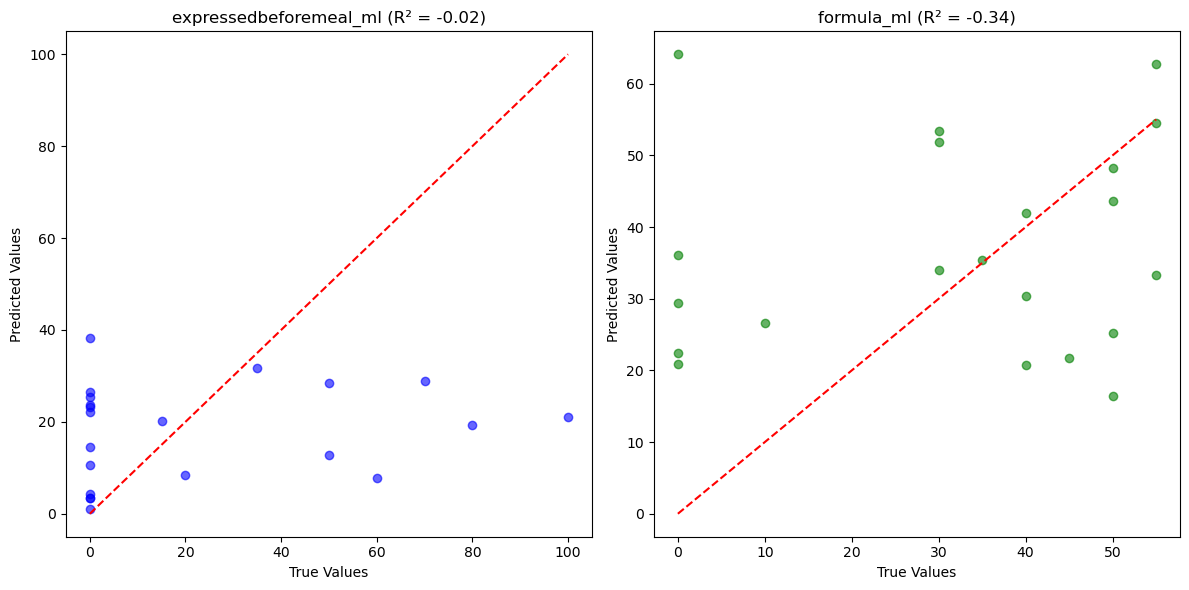

In [291]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Sample true and predicted values
true_values = y_test
predicted_values = pd.DataFrame(y_pred, columns=['expressedbeforemeal_ml', 'formula_ml'])

# Calculate R² for each target
r2_expressed = r2_score(true_values['expressedbeforemeal_ml'], predicted_values['expressedbeforemeal_ml'])
r2_needs = r2_score(true_values['formula_ml'], predicted_values['formula_ml'])

print(f"R² for expressedbeforemeal_ml: {r2_expressed:.2f}")
print(f"R² for formula_ml: {r2_needs:.2f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Milk Expressed
axes[0].scatter(true_values['expressedbeforemeal_ml'], predicted_values['expressedbeforemeal_ml'], alpha=0.6, color='blue')
axes[0].plot([true_values['expressedbeforemeal_ml'].min(), true_values['expressedbeforemeal_ml'].max()],
             [true_values['expressedbeforemeal_ml'].min(), true_values['expressedbeforemeal_ml'].max()],
             color='red', linestyle='--')
axes[0].set_title(f"expressedbeforemeal_ml (R² = {r2_expressed:.2f})")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")

# Scatter plot for Baby Milk Needs
axes[1].scatter(true_values['formula_ml'], predicted_values['formula_ml'], alpha=0.6, color='green')
axes[1].plot([true_values['formula_ml'].min(), true_values['formula_ml'].max()],
             [true_values['formula_ml'].min(), true_values['formula_ml'].max()],
             color='red', linestyle='--')
axes[1].set_title(f"formula_ml (R² = {r2_needs:.2f})")
axes[1].set_xlabel("True Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

In [295]:
r2_expressed = r2_score(y_test['expressedbeforemeal_ml'], y_pred[:, 0])
r2_needs = r2_score(y_test['formula_ml'], y_pred[:, 1])

print(f"R^2 for Milk Expressed: {r2_expressed:.2f}")
print(f"R^2 for Baby Needs: {r2_needs:.2f}")

R^2 for Milk Expressed: -0.02
R^2 for Baby Needs: -0.34
